# Inspecting Model Time Evolution

We explore the predicted flux and colors of our ported 91bg model over time.

In [1]:
import sys

import numpy as np
import sncosmo
from sndata.csp import dr3
from matplotlib import pyplot as plt

sys.path.append('../')
from analysis_pipeline.models import register_sources


We arbitrarily choose to use the CSP band passes.

In [2]:
register_sources(True)
dr3.register_filters(True)

# A set of fiducial band passes.
unique_bands = (
    'csp_dr3_u',
    'csp_dr3_g',
    'csp_dr3_r',
    'csp_dr3_i',
    'csp_dr3_B',
    'csp_dr3_V'
)

unique_colors = tuple((unique_bands[i], unique_bands[i + 1]) for i in range(len(unique_bands) - 1))


In [3]:
def plot_flux_for_param(source, param_name, param_value):
    """Plot a modeled light curve over the range of a given param
    
    Args:
        source    (Source): An sncosmo source class
        param_name   (str): Name of the param to vary
        param_value  (str): Values of the param to plot
    """

    model = sncosmo.Model(source)
    phase = np.arange(model.mintime(), model.maxtime())
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for band, axis in zip(unique_bands, axes.flatten()):
        for p_val in param_value:
            model.update({param_name: p_val})
            flux = model.bandflux(band, phase, zp=25, zpsys='AB')
            axis.plot(phase, flux, label=f'{param_name} = {p_val}')
            axis.set_xlabel('Time')
            axis.set_ylabel('Flux')
            axis.set_title(band)
            axis.legend()
    
    plt.show()


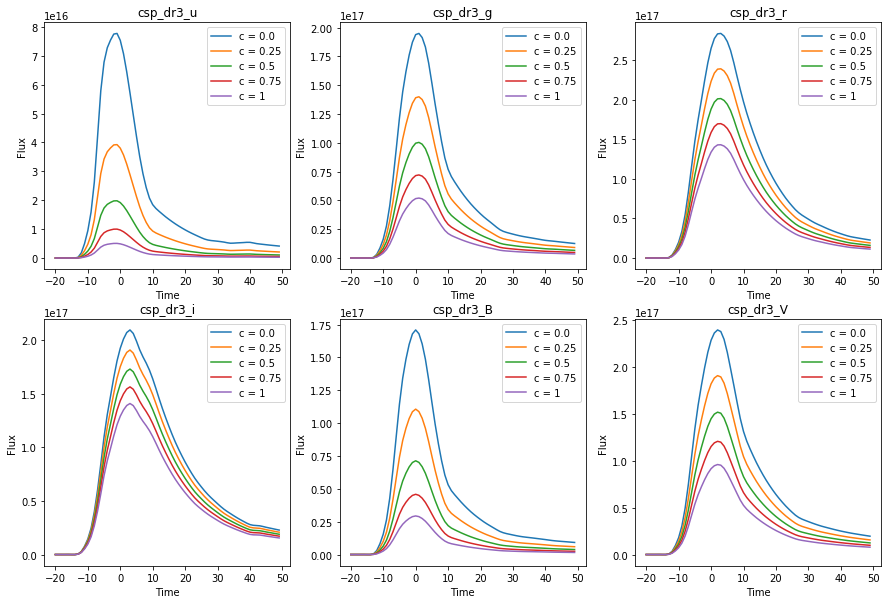

In [4]:
plot_flux_for_param('sn91bg', 'c', (0.0, 0.25, 0.5, 0.75, 1))


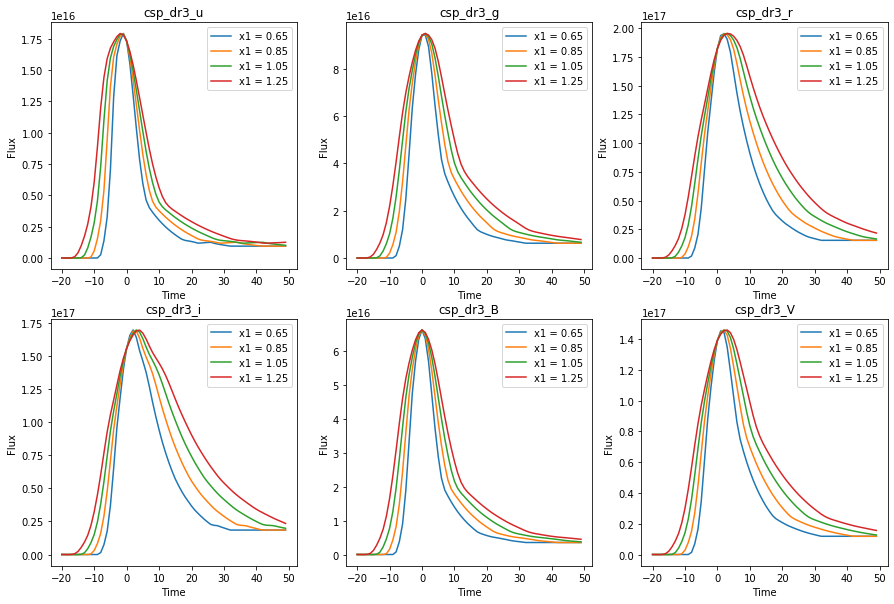

In [5]:
plot_flux_for_param('sn91bg', 'x1', (0.65, 0.85, 1.05, 1.25))


In [6]:
def plot_color_for_param(source, param_name, param_value):
    """Plot a modeled light curve over the range of a given param
    
    Args:
        source    (Source): An sncosmo source class
        param_name   (str): Name of the param to vary
        param_value  (str): Values of the param to plot
    """

    model = sncosmo.Model(source)
    phase = np.arange(model.mintime(), model.maxtime())
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for (band1, band2), axis in zip(unique_colors, axes.flatten()):
        for p_val in param_value:
            model.update({param_name: p_val})
            color = model.color(band1, band2, 'ab', phase)
            axis.plot(phase, color, label=f'{param_name} = {p_val}')
            axis.set_xlabel('Time')
            axis.set_ylabel('Color')
            axis.set_title(f'{band1} - {band2}')
            axis.legend()
            
    plt.tight_layout()
    plt.show()


/anaconda3/envs/sdss_class/lib/python3.7/site-packages/sncosmo/models.py:186: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


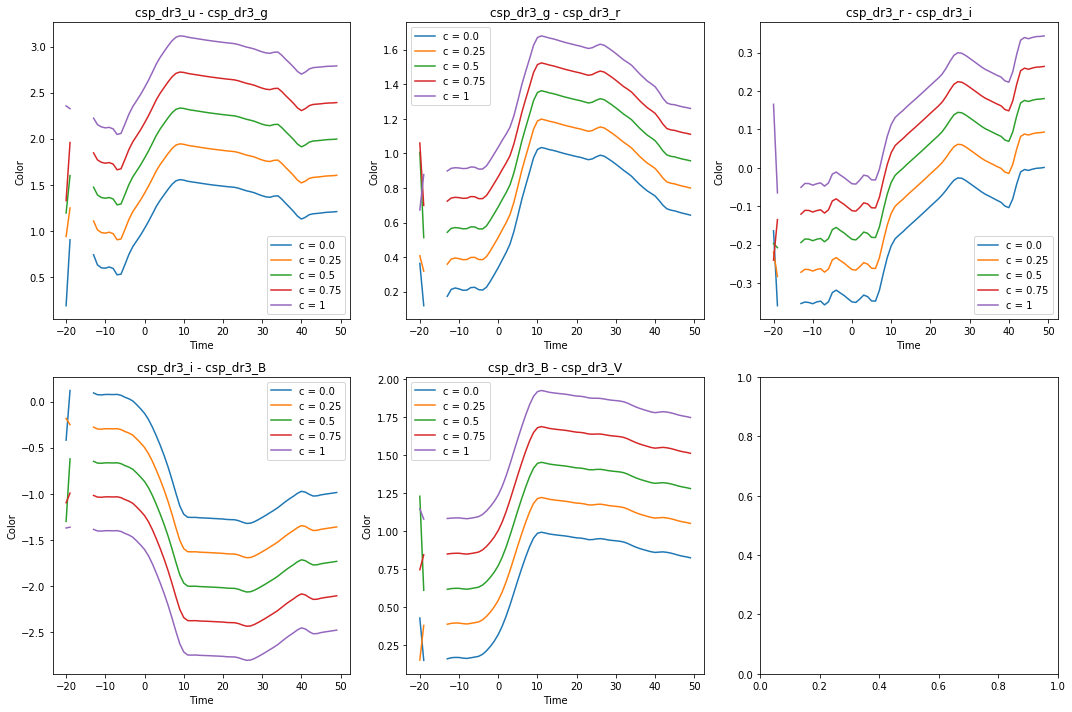

In [7]:
plot_color_for_param('sn91bg', 'c', (0.0, 0.25, 0.5, 0.75, 1))


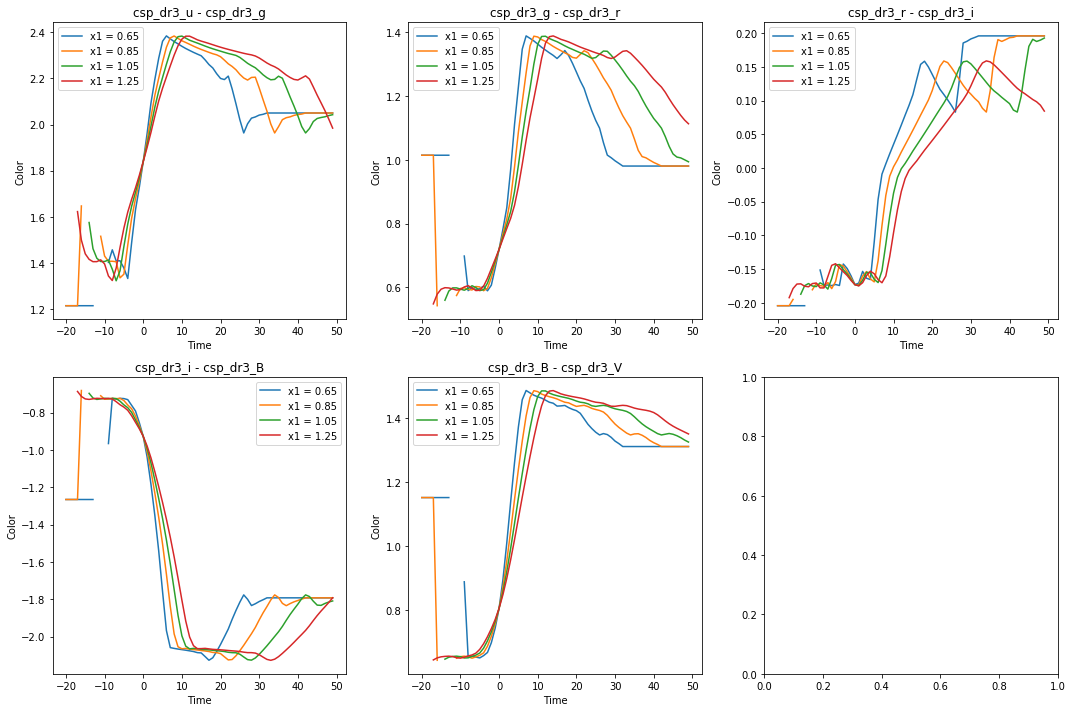

In [8]:
plot_color_for_param('sn91bg', 'x1', (0.65, 0.85, 1.05, 1.25))
